# Parse an example file
Here we load an example file into pycel and parse it all the way through. The network graph is then shown below.

In [1]:
%matplotlib inline
# import basics
from pycel import ExcelCompiler
from IPython.display import FileLink
import matplotlib.pyplot as plt

In [2]:
filename = "../example/example.xlsx"
print("Loading {}...".format(filename))

# load & compile the file to a graph
excel = ExcelCompiler(filename=filename)

Loading ../example/example.xlsx...


In [3]:
# test evaluation
print("D1 is {}".format(excel.evaluate('Sheet1!D1')))

D1 is -0.022863768173008364


In [4]:
print("Setting A1 to 200")
excel.set_value('Sheet1!A1', 200)

print("D1 is now %s (the same should happen in Excel)" % excel.evaluate(
    'Sheet1!D1'))

Setting A1 to 200
D1 is now -0.0033119686538834363 (the same should happen in Excel)


Plotting using matplotlib...


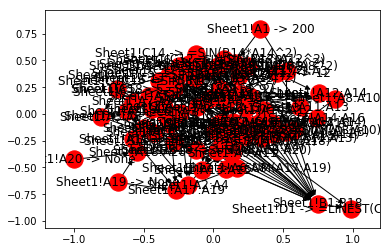

In [5]:
# show the graph using matplotlib if installed
print("Plotting using matplotlib...")
excel.plot_graph()

In [6]:
# export the graph, can be loaded by a viewer like gephi
print("Exporting to gexf...")
excel.export_to_gexf(filename + ".gexf")

Exporting to gexf...


In [7]:
# As an alternative to using evaluate to put cells in the graph and
# as a way to trim down the size of the file to just that needed.
excel.trim_graph(input_addrs=['Sheet1!A1'], output_addrs=['Sheet1!D1'])

In [8]:
# As a sanity check, validate that the compiled code can produce
# the current cell values.
assert {} == excel.validate_calcs(output_addrs=['Sheet1!D1'])

0 formulas left to process
0 formulas left to process
0 formulas left to process


In [9]:
print("Serializing to disk...")
excel.to_file(filename)
FileLink(filename + '.yml')

Serializing to disk...


C:\Users\stephen\Documents\github\pycel\example\example.xlsx.yml

In [10]:
# To reload the file later...

print("Loading from compiled file...")
excel2 = ExcelCompiler.from_file(filename)

# test evaluation
print("D1 is %s" % excel2.evaluate('Sheet1!D1'))

print("Setting A1 to 1")
excel2.set_value('Sheet1!A1', 1)

print("D1 is now %s (the same should happen in Excel)" % excel2.evaluate(
    'Sheet1!D1'))

Loading from compiled file...
D1 is -0.0033119686538834363
Setting A1 to 1
D1 is now -0.022863768173008354 (the same should happen in Excel)
